In [1]:
import gymnasium as gym
from gymnasium.wrappers import NumpyToTorch
import torch
import matplotlib.pyplot as plt

In [2]:
env = gym.make('LunarLander-v3')
env = NumpyToTorch(env)

In [3]:
env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [4]:
obs_sample = env.observation_space.sample()
obs_sample

array([ 0.08779556, -0.6372228 ,  2.771209  , -3.3174458 , -0.6621011 ,
        7.384043  ,  0.5836857 ,  0.31017837], dtype=float32)

In [5]:
obs_sample.shape

(8,)

In [6]:
env.action_space

Discrete(4)

In [7]:
action_sample = env.action_space.sample()
action_sample

np.int64(1)

In [8]:
state, info = env.reset()
state

tensor([-0.0063,  1.4043, -0.6331, -0.2956,  0.0072,  0.1434,  0.0000,  0.0000])

In [9]:
next_state, reward, done, terminated, _ = env.step(action_sample)

In [10]:
next_state

tensor([-0.0126,  1.3970, -0.6401, -0.3212,  0.0159,  0.1732,  0.0000,  0.0000])

In [11]:
reward

-1.9219847420352483

In [12]:
done # done is when state successfully finished or passed

False

In [13]:
terminated # terminated is when agent failed 

False

In [14]:
from src.dqn import * 

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
lr = 0.0001
gamma = 0.99
in_feats = 8
hidden_size = 256
out_feats = 4

In [16]:
policy = DQN(lr, gamma, in_feats, hidden_size, out_feats).to(device)
target = DQN(lr, gamma, in_feats, hidden_size, out_feats).to(device)

agent = Agent(policy, target, device)

In [17]:
with torch.no_grad():
    values = agent.policy_net.forward(state.to(device))
    action = agent.select_action(state.to(device))

print(values)
print(action)

tensor([-0.0347,  0.0627, -0.0582,  0.0675], device='cuda:0')
1


In [18]:
rewards = train(agent, device, env, 1000, 'models/lunarlander_policy.pt', 'models/lunarlander_target.pt')

new best model with reward -181.51, saving...
finished episode 0 with reward: -181.51
episode timesteps: 68
total timesteps completed: 68
--------------------
new best model with reward -117.48, saving...
finished episode 1 with reward: -117.48
episode timesteps: 125
total timesteps completed: 193
--------------------
finished episode 2 with reward: -318.08
episode timesteps: 105
total timesteps completed: 298
--------------------
new best model with reward -75.97, saving...
finished episode 3 with reward: -75.97
episode timesteps: 111
total timesteps completed: 409
--------------------
finished episode 4 with reward: -103.26
episode timesteps: 69
total timesteps completed: 478
--------------------
finished episode 5 with reward: -93.95
episode timesteps: 63
total timesteps completed: 541
--------------------
finished episode 6 with reward: -284.49
episode timesteps: 100
total timesteps completed: 641
--------------------
finished episode 7 with reward: -147.53
episode timesteps: 86
to

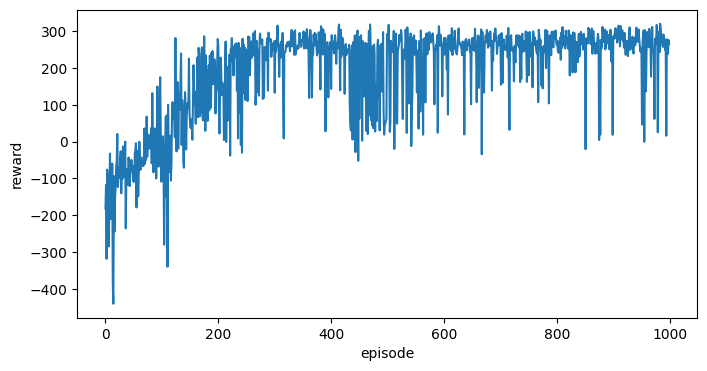

In [19]:
plt.figure(figsize = (8, 4))
plt.plot(rewards)
plt.xlabel('episode')
plt.ylabel('reward')
plt.show()

In [20]:
env.close()

In [21]:
agent = Agent.load_agent('models/lunarlander_policy.pt', 'models/lunarlander_target.pt', device)

eval_env = gym.make('LunarLander-v3', render_mode = 'human')
eval_env = NumpyToTorch(eval_env)

evaluate(agent, device, eval_env, 5)
eval_env.close()

evaluation reward: 260.2894549685802
evaluation reward: 276.82507450604504
evaluation reward: 166.18210440035404
evaluation reward: 169.8619456695737
evaluation reward: 174.4956330781526
average reward: 209.53084252454113


In [22]:
eval_env = gym.make('LunarLander-v3')
eval_env = NumpyToTorch(eval_env)

evaluate(agent, device, eval_env, 100)
eval_env.close()

evaluation reward: 248.37502184601183
evaluation reward: 253.96165108288793
evaluation reward: 289.00701259232324
evaluation reward: 197.15297226212144
evaluation reward: 283.6488981217447
evaluation reward: 166.87185899545523
evaluation reward: 307.0858280325318
evaluation reward: 305.0814852904239
evaluation reward: 167.08347361755912
evaluation reward: 160.74423263703585
evaluation reward: 252.46430970531094
evaluation reward: 303.454669766671
evaluation reward: 307.7312004151747
evaluation reward: 277.06622489519685
evaluation reward: 293.56248781645525
evaluation reward: 146.04088071860613
evaluation reward: 241.0905316398267
evaluation reward: 261.52583814682714
evaluation reward: 264.94623668344104
evaluation reward: 250.38104256261317
evaluation reward: 275.816993837761
evaluation reward: 311.9527672319032
evaluation reward: 301.94208660669085
evaluation reward: 263.2937306189225
evaluation reward: 268.4508275106159
evaluation reward: 153.13596784464303
evaluation reward: 256.8